## This code already have the functionality to save 1000 columns randomly. 
### select the temporal data 
### select the static data 
### save both of them to csv files. 

In [4]:
import numpy as np 
import pandas as pd 
import os 

In [5]:
# Load sales data
dataset_path  = "/Users/raman/JupyterNotebooks/Comparison_Multivariate/dataset/M5/"

sales_data = pd.read_csv (os.path.join(dataset_path, "sales_train_validation.csv"))
# The sell_prices.csv file is not needed for extracting static features
# but can be used for other purposes such as price analysis
sales_data


id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  \
0         CA_1       CA    0    0    0    0  ...       1       3       0   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       2       1       2   
3         CA_1       CA    0    0    0    0  ...       1       0       5   
4         CA_1       CA    0    0    0    0  ...       2       1       1   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       2       0       0   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       2       1       0   
30488     WI_3       WI    0    0    0    0  ...       0       0       1   
30489     WI_3       WI    0    0    0    0  ...       0       0       0   

       d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0           1       1       1       3       0       1       1  
1           0       0       1       0       0       0       0  
2           1       1       1       0       1       1       1  
3           4       1       0       1       3       7       2  
4           0       1       1       2       2       2       4  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       0       0       1       0       0       1  
30486       0       0       0       0       0       1       0  
30487       2       0       1       0       0       1       0  
30488       0       0       1       0       3       1       3  
30489       0       0       0       0       0       0       0  

[30490 rows x 1919 columns]

In [6]:
# Extract static features directly
static_features = sales_data[['id','item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']].copy()
static_features

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  
0         CA_1       CA  
1         CA_1       CA  
2         CA_1       CA  
3         CA_1       CA  
4         CA_1       CA  
...        ...      ...  
30485     WI_3       WI  
30486     WI_3       WI  
30487     WI_3       WI  
30488     WI_3       WI  
30489     WI_3       WI  

[30490 rows x 6 columns]

In [7]:
# Calculate mean sales for each item
# Exclude the first six columns as they are identifiers and not sales data
mean_sales = sales_data.iloc[:, 7:].mean(axis=1)
static_features['mean_sales'] = mean_sales


In [8]:
# Display the first few rows to verify
static_features


id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  mean_sales  
0         CA_1       CA    0.313808  
1         CA_1       CA    0.257845  
2         CA_1       CA    0.150628  
3         CA_1       CA    1.719665  
4         CA_1       CA    0.967050  
...        ...      ...         ...  
30485     WI_3       WI    0.534519  
30486     WI_3       WI    0.376569  
30487     WI_3       WI    0.895397  
30488     WI_3       WI    0.367155  
30489     WI_3       WI    0.695084  

[30490 rows x 7 columns]

In [9]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for column in ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']:
    encoders[column] = LabelEncoder()
    static_features[column] = encoders[column].fit_transform(static_features[column])

static_features

id  item_id  dept_id  cat_id  store_id  \
0      HOBBIES_1_001_CA_1_validation     1437        3       1         0   
1      HOBBIES_1_002_CA_1_validation     1438        3       1         0   
2      HOBBIES_1_003_CA_1_validation     1439        3       1         0   
3      HOBBIES_1_004_CA_1_validation     1440        3       1         0   
4      HOBBIES_1_005_CA_1_validation     1441        3       1         0   
...                              ...      ...      ...     ...       ...   
30485    FOODS_3_823_WI_3_validation     1432        2       0         9   
30486    FOODS_3_824_WI_3_validation     1433        2       0         9   
30487    FOODS_3_825_WI_3_validation     1434        2       0         9   
30488    FOODS_3_826_WI_3_validation     1435        2       0         9   
30489    FOODS_3_827_WI_3_validation     1436        2       0         9   

       state_id  mean_sales  
0             0    0.313808  
1             0    0.257845  
2             0    0.150628  
3             0    1.719665  
4             0    0.967050  
...         ...         ...  
30485         2    0.534519  
30486         2    0.376569  
30487         2    0.895397  
30488         2    0.367155  
30489         2    0.695084  

[30490 rows x 7 columns]

In [10]:
static_features.id.nunique()

30490

In [11]:
static_features

id  item_id  dept_id  cat_id  store_id  \
0      HOBBIES_1_001_CA_1_validation     1437        3       1         0   
1      HOBBIES_1_002_CA_1_validation     1438        3       1         0   
2      HOBBIES_1_003_CA_1_validation     1439        3       1         0   
3      HOBBIES_1_004_CA_1_validation     1440        3       1         0   
4      HOBBIES_1_005_CA_1_validation     1441        3       1         0   
...                              ...      ...      ...     ...       ...   
30485    FOODS_3_823_WI_3_validation     1432        2       0         9   
30486    FOODS_3_824_WI_3_validation     1433        2       0         9   
30487    FOODS_3_825_WI_3_validation     1434        2       0         9   
30488    FOODS_3_826_WI_3_validation     1435        2       0         9   
30489    FOODS_3_827_WI_3_validation     1436        2       0         9   

       state_id  mean_sales  
0             0    0.313808  
1             0    0.257845  
2             0    0.150628  
3             0    1.719665  
4             0    0.967050  
...         ...         ...  
30485         2    0.534519  
30486         2    0.376569  
30487         2    0.895397  
30488         2    0.367155  
30489         2    0.695084  

[30490 rows x 7 columns]

In [12]:
np.save("M5_static.npy", static_features.to_numpy())


In [13]:
np.load('M5_static.npy')

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [14]:
df_cal = pd.read_csv("../../../JupyterNotebooks/Comparison_Multivariate/dataset/M5/calendar.csv")


In [15]:
df_cal[:1913]

date  wm_yr_wk    weekday  wday  month  year       d event_name_1  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1          NaN   
1     2011-01-30     11101     Sunday     2      1  2011     d_2          NaN   
2     2011-01-31     11101     Monday     3      1  2011     d_3          NaN   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4          NaN   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5          NaN   
...          ...       ...        ...   ...    ...   ...     ...          ...   
1908  2016-04-20     11612  Wednesday     5      4  2016  d_1909          NaN   
1909  2016-04-21     11612   Thursday     6      4  2016  d_1910          NaN   
1910  2016-04-22     11612     Friday     7      4  2016  d_1911          NaN   
1911  2016-04-23     11613   Saturday     1      4  2016  d_1912          NaN   
1912  2016-04-24     11613     Sunday     2      4  2016  d_1913          NaN   

     event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0             NaN          NaN          NaN        0        0        0  
1             NaN          NaN          NaN        0        0        0  
2             NaN          NaN          NaN        0        0        0  
3             NaN          NaN          NaN        1        1        0  
4             NaN          NaN          NaN        1        0        1  
...           ...          ...          ...      ...      ...      ...  
1908          NaN          NaN          NaN        0        0        0  
1909          NaN          NaN          NaN        0        0        0  
1910          NaN          NaN          NaN        0        0        0  
1911          NaN          NaN          NaN        0        0        0  
1912          NaN          NaN          NaN        0        0        0  

[1913 rows x 14 columns]

In [16]:
dataset_path  = "/Users/raman/JupyterNotebooks/Comparison_Multivariate/dataset/M5/"

#sales_data = pd.read_csv('sales_train.csv')
sales_data = pd.read_csv (os.path.join(dataset_path, "sales_train_validation.csv"))
# The sell_prices.csv file is not needed for extracting static features
# but can be used for other purposes such as price analysis



In [17]:
sales_data.id.nunique(), sales_data.item_id.nunique(), sales_data.dept_id.nunique(),sales_data.cat_id.nunique(),sales_data.store_id.nunique(), sales_data.state_id.nunique()


(30490, 3049, 7, 3, 10, 3)

In [18]:
sales_data.item_id.value_counts()

HOBBIES_1_001      10
FOODS_2_210        10
FOODS_2_201        10
FOODS_2_202        10
FOODS_2_203        10
                   ..
HOUSEHOLD_1_464    10
HOUSEHOLD_1_465    10
HOUSEHOLD_1_466    10
HOUSEHOLD_1_467    10
FOODS_3_827        10
Name: item_id, Length: 3049, dtype: int64

In [19]:
df_sales = pd.concat([sales_data.iloc[:,:1], sales_data.iloc[:,6:]], axis=1)
df_sales = df_sales.set_index(["id"]).T.reset_index().drop(columns=["index"])

In [20]:
df_sales

id    HOBBIES_1_001_CA_1_validation  HOBBIES_1_002_CA_1_validation  \
0                                 0                              0   
1                                 0                              0   
2                                 0                              0   
3                                 0                              0   
4                                 0                              0   
...                             ...                            ...   
1908                              1                              1   
1909                              3                              0   
1910                              0                              0   
1911                              1                              0   
1912                              1                              0   

id    HOBBIES_1_003_CA_1_validation  HOBBIES_1_004_CA_1_validation  \
0                                 0                              0   
1                                 0                              0   
2                                 0                              0   
3                                 0                              0   
4                                 0                              0   
...                             ...                            ...   
1908                              1                              0   
1909                              0                              1   
1910                              1                              3   
1911                              1                              7   
1912                              1                              2   

id    HOBBIES_1_005_CA_1_validation  HOBBIES_1_006_CA_1_validation  \
0                                 0                              0   
1                                 0                              0   
2                                 0                              0   
3                                 0                              0   
4                                 0                              0   
...                             ...                            ...   
1908                              1                              0   
1909                              2                              0   
1910                              2                              2   
1911                              2                              0   
1912                              4                              0   

id    HOBBIES_1_007_CA_1_validation  HOBBIES_1_008_CA_1_validation  \
0                                 0                             12   
1                                 0                             15   
2                                 0                              0   
3                                 0                              0   
4                                 0                              0   
...                             ...                            ...   
1908                              1                              4   
1909                              0                              6   
1910                              0                              3   
1911                              1                              2   
1912                              1                              1   

id    HOBBIES_1_009_CA_1_validation  HOBBIES_1_010_CA_1_validation  ...  \
0                                 2                              0  ...   
1                                 0                              0  ...   
2                                 7                              1  ...   
3                                 3                              0  ...   
4                                 0                              0  ...   
...                             ...                            ...  ...   
1908                              0                              0  ...   
1909                              0 

# Select 1000 random numbers
- select 1000 columns from df_sales and rename the index column as date; write to csv file. 
- select 1000 columns for static data as well and save them to a csv file. 


In [21]:
s = np.random.random_integers(0,30490,1000).tolist()

/var/folders/y_/ckryxn657xd1sjqy61rgk5q80000gn/T/ipykernel_23749/2241221663.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 30490 + 1) instead
  s = np.random.random_integers(0,30490,1000).tolist()


In [22]:

df_sales = df_sales.rename_axis("date",axis=0).rename_axis("",axis=1).iloc[:,s]
df_sales.to_csv("/Users/raman/JupyterNotebooks/Comparison_Multivariate/dataset/M5/sales_1000_Random_columns.csv")

In [23]:
df_sales

HOUSEHOLD_1_025_WI_3_validation  HOBBIES_1_201_TX_2_validation  \
date                                                                   
0                                   1                              6   
1                                   2                              7   
2                                   3                              0   
3                                   1                              0   
4                                   0                              2   
...                               ...                            ...   
1908                                1                              0   
1909                                1                              1   
1910                                0                              5   
1911                                2                              2   
1912                                0                              1   

      FOODS_3_299_TX_3_validation  FOODS_3_232_CA_4_validation  \
date                                                             
0                               0                            4   
1                               0                            3   
2                               0                            1   
3                               0                            5   
4                               0                            0   
...                           ...                          ...   
1908                            2                            0   
1909                            0                            0   
1910                            2                            3   
1911                            0                            4   
1912                            0                            0   

      HOUSEHOLD_2_417_TX_2_validation  FOODS_2_244_CA_4_validation  \
date                                                                 
0                                   1                           10   
1                                   1                           17   
2                                   0                           11   
3                                   0                           13   
4                                   0                            8   
...                               ...                          ...   
1908                                0                            2   
1909                                0                            3   
1910                                0                            9   
1911                                0                            6   
1912                                0                            8   

      HOUSEHOLD_2_033_CA_2_validation  FOODS_2_305_WI_3_validation  \
date                                                                 
0                                   1                            1   
1                                   0                            0   
2                                   0                            1   
3                                   1                            2   
4                                   0                            0   
...                               ...                          ...   
1908                                0                            2   
1909                                0                            0   
1910                                0                            0   
1911                                1                            1   
1912                                2                            0   

      HOUSEHOLD_2_024_TX_2_validation  FOODS_3_265_CA_4_validation  ...  \
date                                                                ...   
0                                   0                            0  ...   
1                                   0                            2  ...   
2                                   0                            3  ...   
3            

In [24]:
!cat /Users/raman/JupyterNotebooks/Comparison_Multivariate/dataset/M5/sales_columns.csv 

date,FOODS_3_168_WI_3_validation,HOBBIES_2_063_CA_3_validation,HOUSEHOLD_1_453_TX_2_validation,FOODS_3_180_CA_3_validation,HOUSEHOLD_1_321_CA_3_validation,HOUSEHOLD_2_379_TX_3_validation,FOODS_2_100_TX_1_validation,HOUSEHOLD_1_437_CA_2_validation,HOUSEHOLD_1_453_TX_3_validation,HOUSEHOLD_2_276_CA_3_validation,HOUSEHOLD_1_259_WI_3_validation,HOBBIES_2_111_WI_3_validation,FOODS_2_133_CA_1_validation,HOBBIES_1_105_TX_3_validation,FOODS_1_139_WI_1_validation,FOODS_3_438_TX_3_validation,HOBBIES_1_184_CA_2_validation,HOUSEHOLD_2_432_CA_4_validation,HOUSEHOLD_1_046_TX_1_validation,FOODS_2_375_WI_1_validation,HOUSEHOLD_2_377_WI_2_validation,HOBBIES_2_147_WI_3_validation,FOODS_3_408_WI_2_validation,HOBBIES_2_135_CA_4_validation,FOODS_3_752_TX_2_validation,HOUSEHOLD_1_464_CA_4_validation,FOODS_3_063_WI_3_validation,HOBBIES_1_058_WI_1_validation,FOODS_3_344_CA_4_validation,FOODS_3_574_WI_1_validation,HOUSEHOLD_2_463_CA_4_validation,HOUSEHOLD_1_154_WI_2_validation,FOODS_1_201_CA_2_validation,HOBBI

# Import the static data for M5

In [25]:
'''
import numpy as np
static_ =  np.load("M5_static.npy") 
print ("statis data shape: ",static_.shape)
for i in range(1,static_.shape[1] ):
    print (np.unique(static_[:,i]).shape)
'''

'\nimport numpy as np\nstatic_ =  np.load("M5_static.npy") \nprint ("statis data shape: ",static_.shape)\nfor i in range(1,static_.shape[1] ):\n    print (np.unique(static_[:,i]).shape)\n'

## Notes about the static dataset 
- The static dataset we have ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
- id is unique for each row, so that can be removed, no two ids are same and hence it is not useful to extract any information. 
- The dataset consist of 3 states 
- 10 store id 
- 3 category id: Food, hobbies,  household 
- 7 department id ['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3']

In [26]:
selected_static_features = static_features.set_index('id').T.iloc[:,s]
selected_static_features

id          HOUSEHOLD_1_025_WI_3_validation  HOBBIES_1_201_TX_2_validation  \
item_id                         2026.000000                    1631.000000   
dept_id                            5.000000                       3.000000   
cat_id                             2.000000                       1.000000   
store_id                           9.000000                       5.000000   
state_id                           2.000000                       1.000000   
mean_sales                         0.725941                       1.829498   

id          FOODS_3_299_TX_3_validation  FOODS_3_232_CA_4_validation  \
item_id                      911.000000                   844.000000   
dept_id                        2.000000                     2.000000   
cat_id                         0.000000                     0.000000   
store_id                       6.000000                     3.000000   
state_id                       1.000000                     0.000000   
mean_sales                     0.827929                     1.951883   

id          HOUSEHOLD_2_417_TX_2_validation  FOODS_2_244_CA_4_validation  \
item_id                         2949.000000                   458.000000   
dept_id                            6.000000                     1.000000   
cat_id                             2.000000                     0.000000   
store_id                           5.000000                     3.000000   
state_id                           1.000000                     0.000000   
mean_sales                         0.203452                     5.617155   

id          HOUSEHOLD_2_033_CA_2_validation  FOODS_2_305_WI_3_validation  \
item_id                         2566.000000                   519.000000   
dept_id                            6.000000                     1.000000   
cat_id                             2.000000                     0.000000   
store_id                           1.000000                     9.000000   
state_id                           0.000000                     2.000000   
mean_sales                         0.511506                     0.274582   

id          HOUSEHOLD_2_024_TX_2_validation  FOODS_3_265_CA_4_validation  ...  \
item_id                            2557.000                   877.000000  ...   
dept_id                               6.000                     2.000000  ...   
cat_id                                2.000                     0.000000  ...   
store_id                              5.000                     3.000000  ...   
state_id                              1.000                     0.000000  ...   
mean_sales                            0.375                     1.694038  ...   

id          FOODS_3_456_TX_1_validation  HOUSEHOLD_2_094_WI_2_validation  \
item_id                     1068.000000                      2627.000000   
dept_id                        2.000000                         6.000000   
cat_id                         0.000000                         2.000000   
store_id                       4.000000                         8.000000   
state_id                       1.000000                         2.000000   
mean_sales                     0.238494                         0.029812   

id          HOUSEHOLD_2_064_WI_1_validation  HOUSEHOLD_2_189_TX_3_validation  \
item_id                         2597.000000                       2721.00000   
dept_id                            6.000000                          6.00000   
cat_id                             2.000000                          2.00000   
store_id                           7.000000                          6.00000   
state_id                           2.000000                          1.00000   
mean_sales                         0.194038                          0.03818   

id          FOODS_2_085_TX_2_validation  HOBBIES_1_294_WI_2_validation  \
item_id                      300.000000                    1722.000000   
dept_id                        1.000000                       3.000000  

In [27]:
np.save("M5_static.npy", selected_static_features.to_numpy())


In [28]:
pd.Series((np.load("M5_static.npy")[1])).value_counts()

2.0    272
5.0    177
6.0    175
1.0    139
3.0    129
0.0     72
4.0     36
dtype: int64

In [29]:
ls 

DivvyDataPrepration.ipynb     metrics_plot.ipynb
M5StaticDataPrepration.ipynb  model_testing.ipynb
M5_static.npy                 model_visualization
divvy_static.npy              model_visualization.png


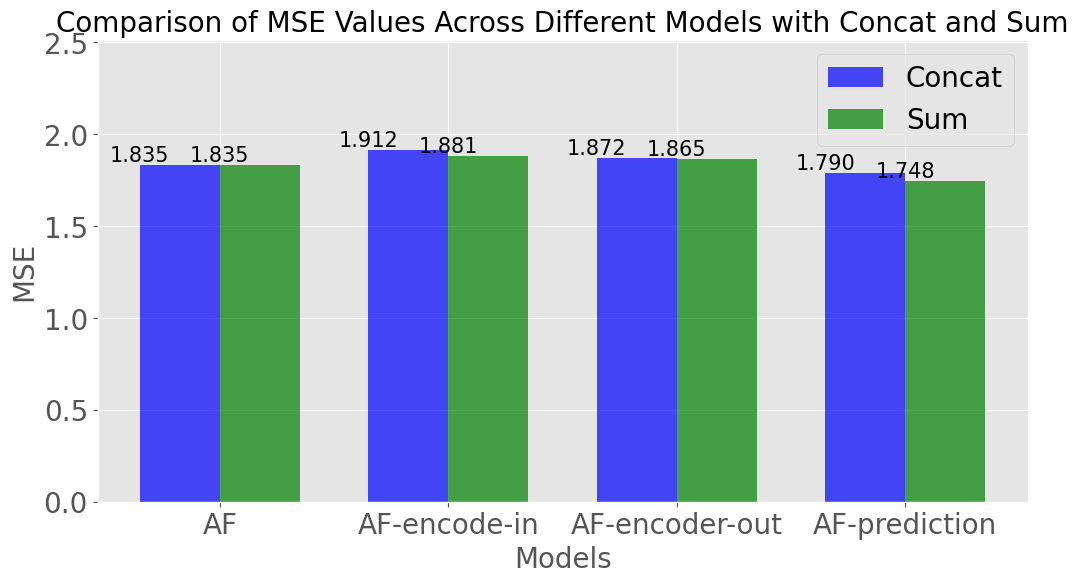

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data for models and their MSE values
models = ['AF', 'AF-encode-in', 'AF-encoder-out', 'AF-prediction']
mse_values_concat = [1.8350, 1.912, 1.872, 1.7899]  # For concat
mse_values_sum = [1.8350, 1.881, 1.865, 1.748]  # For sum

# Creating a bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models))  # The label locations

plt.figure(figsize=(12, 6))

# Plotting both sets of data
plt.bar(index, mse_values_concat, bar_width, label='Concat', color='blue', alpha=0.7)
plt.bar(index + bar_width, mse_values_sum, bar_width, label='Sum', color='green', alpha=0.7)

# Adding labels and title with increased font size
plt.xlabel('Models', fontsize=20)  # Increased font size
plt.ylabel('MSE', fontsize=20)  # Increased font size
plt.title('Comparison of MSE Values Across Different Models with Concat and Sum', fontsize=20)  # Increased font size
plt.xticks(index + bar_width / 2, models, fontsize=20)  # Increased font size for ticks
plt.yticks(fontsize=20)  # Set the font size for Y-axis tick labels
plt.legend(fontsize=20)  # Increased font size for legend
plt.ylim(0, max_mse * 1.35)  # 1.2x the max value for additional space

# Adding value labels on bars for better clarity with increased font size
for i in range(len(models)):
    plt.text(i - bar_width/2, mse_values_concat[i] + 0.02, f'{mse_values_concat[i]:.3f}', ha='center', fontsize=15)
    plt.text(i + bar_width/2, mse_values_sum[i] + 0.02, f'{mse_values_sum[i]:.3f}', ha='center', fontsize=15)

plt.show()


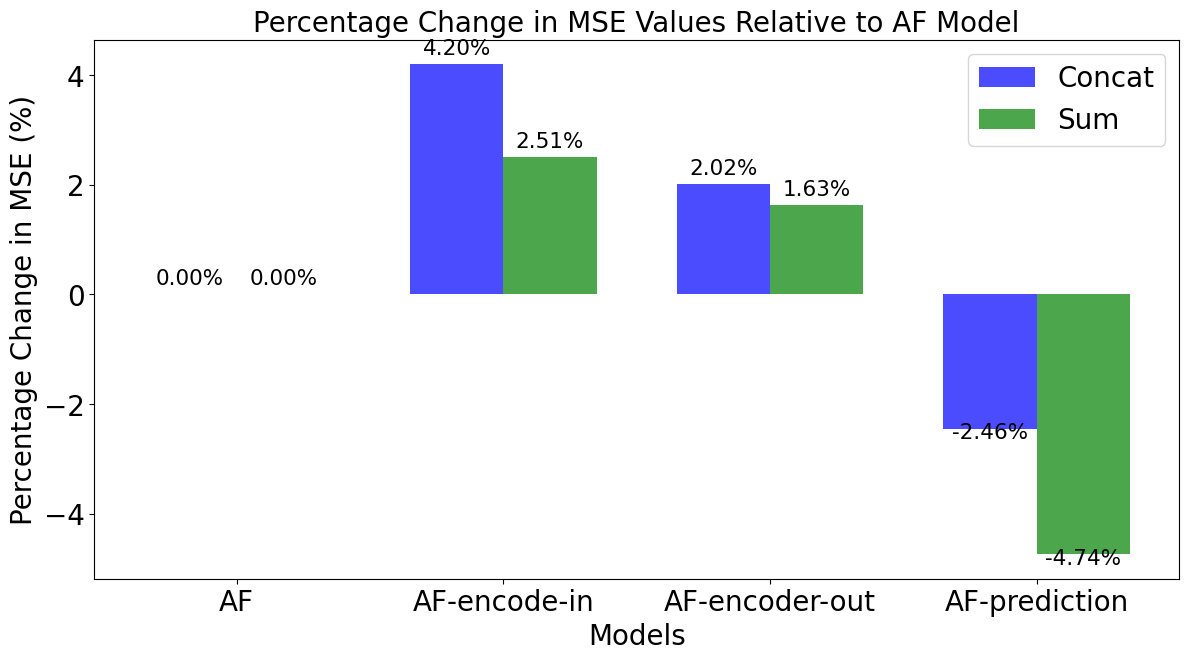

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data for models and their MSE values
models = ['AF', 'AF-encode-in', 'AF-encoder-out', 'AF-prediction']
mse_values_concat = [1.8350, 1.912, 1.872, 1.7899]  # For concat
mse_values_sum = [1.8350, 1.881, 1.865, 1.748]  # For sum

# Calculating % change w.r.t 'AF' for each model
percent_change_concat = [(val - mse_values_concat[0]) / mse_values_concat[0] * 100 for val in mse_values_concat]
percent_change_sum = [(val - mse_values_sum[0]) / mse_values_sum[0] * 100 for val in mse_values_sum]

# Creating a bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models))  # The label locations

plt.figure(figsize=(14, 7))

# Plotting both sets of data
bars1 = plt.bar(index, percent_change_concat, bar_width, label='Concat', color='blue', alpha=0.7)
bars2 = plt.bar(index + bar_width, percent_change_sum, bar_width, label='Sum', color='green', alpha=0.7)

# Adding labels and title with increased font size
plt.xlabel('Models', fontsize=20)  # 1.5x size
plt.ylabel('Percentage Change in MSE (%)', fontsize=20)  # 1.5x size
plt.title('Percentage Change in MSE Values Relative to AF Model', fontsize=20.)  # 1.5x size
plt.xticks(index + bar_width / 2, models, fontsize=20)  # 1.5x size for ticks
plt.yticks(fontsize=20)  # Set the font size for Y-axis tick labels

plt.legend(fontsize=20)  # 1.5x size for legend

# Adding value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        # Adjusting label position based on bar height
        if height > 1:
            label_position = height + 0.1
        elif height < -1:
            label_position = height - 0.25
        else:
            label_position = height + 0.1  # Minor adjustment for values close to zero
        plt.text(bar.get_x() + bar.get_width() / 2, label_position, f'{height:.2f}%', ha='center', va='bottom', fontsize=15.5)  # 1.5x size for text

add_value_labels(bars1)
add_value_labels(bars2)

plt.show()


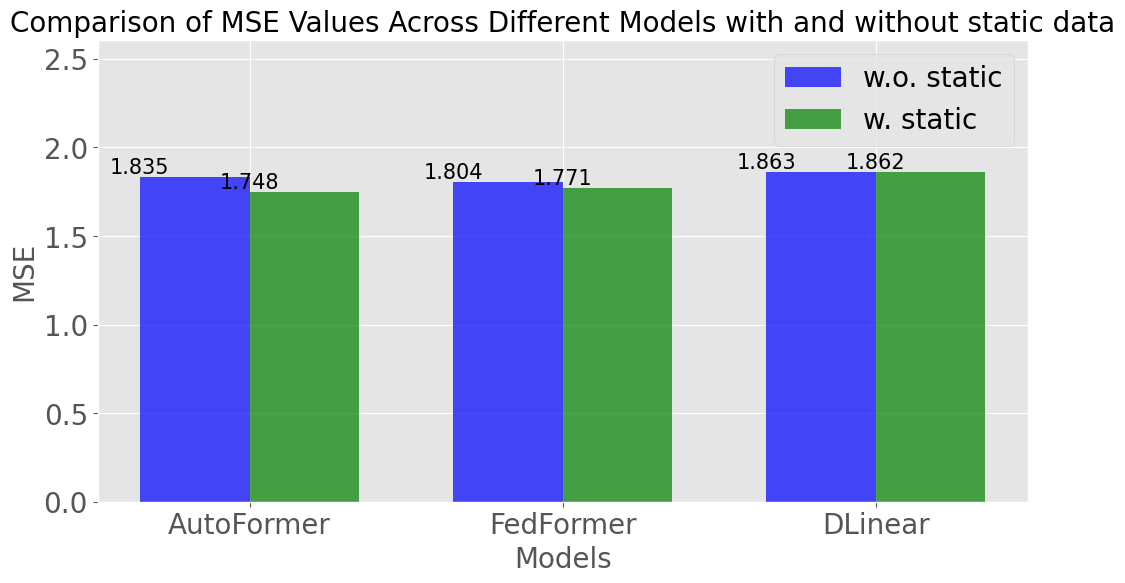

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data for models and their MSE values
models = ['AutoFormer', 'FedFormer', 'DLinear']
mse_values_concat = [1.8350,1.804, 1.8630]  # without static
mse_values_sum = [1.748,1.771, 1.8617 ]  # with static 

# Creating a bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models))  # The label locations

plt.figure(figsize=(12, 6))

# Plotting both sets of data
plt.bar(index, mse_values_concat, bar_width, label='w.o. static', color='blue', alpha=0.7)
plt.bar(index + bar_width, mse_values_sum, bar_width, label='w. static', color='green', alpha=0.7)

# Adding labels and title with increased font size
plt.xlabel('Models', fontsize=20)  # Increased font size
plt.ylabel('MSE', fontsize=20)  # Increased font size
plt.title('Comparison of MSE Values Across Different Models with and without static data', fontsize=20)  # Increased font size
plt.xticks(index + bar_width / 2, models, fontsize=20)  # Increased font size for ticks
plt.yticks(fontsize=20)  # Set the font size for Y-axis tick labels
plt.legend(fontsize=20)  # Increased font size for legend
plt.ylim(0, max_mse * 1.40)  # 1.2x the max value for additional space

# Adding value labels on bars for better clarity with increased font size
for i in range(len(models)):
    plt.text(i - bar_width/2, mse_values_concat[i] + 0.02, f'{mse_values_concat[i]:.3f}', ha='center', fontsize=15)
    plt.text(i + bar_width/2, mse_values_sum[i] + 0.02, f'{mse_values_sum[i]:.3f}', ha='center', fontsize=15)

plt.show()


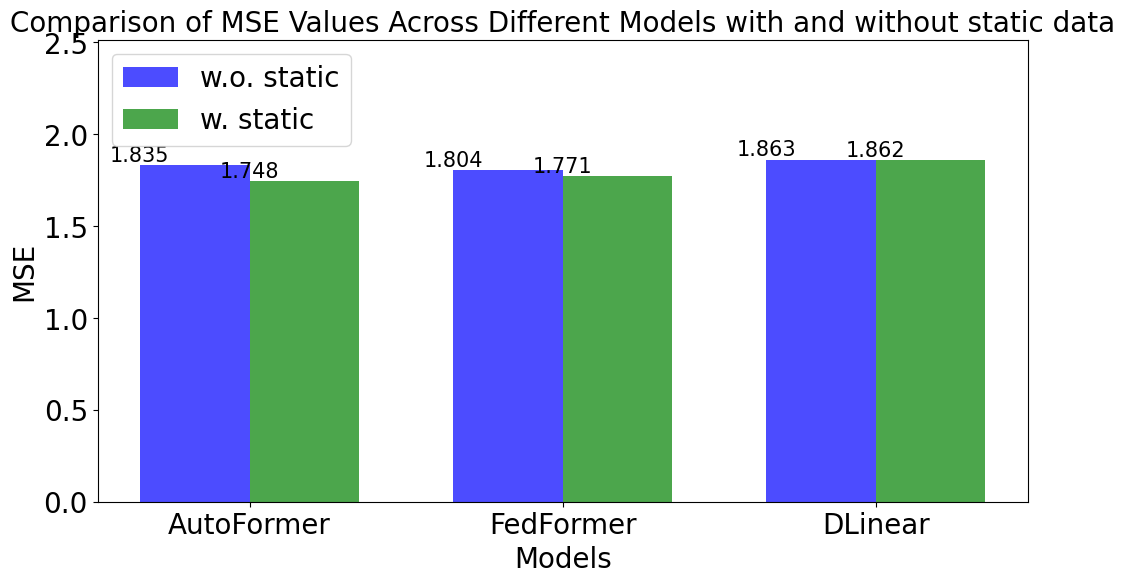

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data for models and their MSE values
models = ['AutoFormer', 'FedFormer', 'DLinear']
mse_values_concat = [1.8350, 1.804, 1.8630]  # without static
mse_values_sum = [1.748, 1.771, 1.8617]  # with static

# Creating a bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models))  # The label locations

plt.figure(figsize=(12, 6))

# Plotting both sets of data
plt.bar(index, mse_values_concat, bar_width, label='w.o. static', color='blue', alpha=0.7)
plt.bar(index + bar_width, mse_values_sum, bar_width, label='w. static', color='green', alpha=0.7)

# Adding labels and title with increased font size
plt.xlabel('Models', fontsize=20)  # Increased font size
plt.ylabel('MSE', fontsize=20)  # Increased font size
plt.title('Comparison of MSE Values Across Different Models with and without static data', fontsize=20)  # Increased font size
plt.xticks(index + bar_width / 2, models, fontsize=20)  # Increased font size for ticks
plt.yticks(fontsize=20)  # Set the font size for Y-axis tick labels
plt.legend(fontsize=20, loc='upper left')  # Increased font size for legend and move to upper left

# Adjust Y axis limit to have 20% more space at the top
max_mse = max(max(mse_values_concat), max(mse_values_sum))
plt.ylim(0, max_mse * 1.35)  # 1.2x the max value for additional space

# Adding value labels on bars for better clarity with increased font size
for i in range(len(models)):
    plt.text(i - bar_width/2, mse_values_concat[i] + 0.02, f'{mse_values_concat[i]:.3f}', ha='center', fontsize=15)
    plt.text(i + bar_width/2, mse_values_sum[i] + 0.02, f'{mse_values_sum[i]:.3f}', ha='center', fontsize=15)

plt.show()


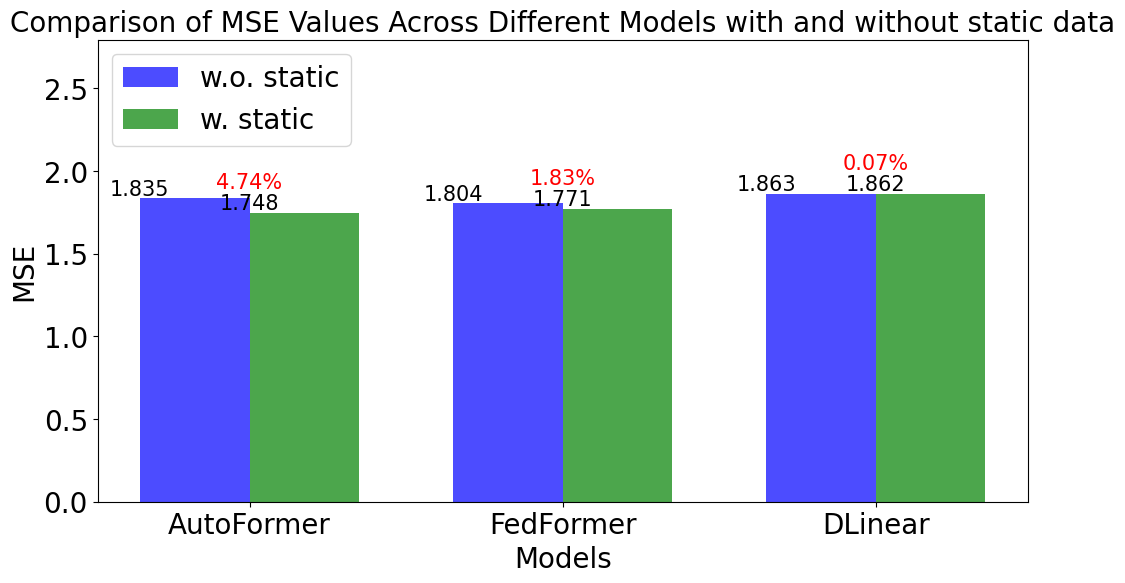

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data for models and their MSE values
models = ['AutoFormer', 'FedFormer', 'DLinear']

mse_values_concat = [1.8350, 1.804, 1.8630]  # without static
mse_values_sum = [1.748, 1.771, 1.8617]  # with static

# Calculate percentage change between without and with static
percent_change = [(1 - (sum_val / concat_val)) * 100 for concat_val, sum_val in zip(mse_values_concat, mse_values_sum)]

# Creating a bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models))  # The label locations

plt.figure(figsize=(12, 6))

# Plotting both sets of data
plt.bar(index, mse_values_concat, bar_width, label='w.o. static', color='blue', alpha=0.7)
plt.bar(index + bar_width, mse_values_sum, bar_width, label='w. static', color='green', alpha=0.7)

# Adding labels and title with increased font size
plt.xlabel('Models', fontsize=20)  # Increased font size
plt.ylabel('MSE', fontsize=20)  # Increased font size
plt.title('Comparison of MSE Values Across Different Models with and without static data', fontsize=20)  # Increased font size
plt.xticks(index + bar_width / 2, models, fontsize=20)  # Increased font size for ticks
plt.yticks(fontsize=20)  # Set the font size for Y-axis tick labels
plt.legend(fontsize=20, loc='upper left')  # Increased font size for legend and move to upper left

# Adjust Y axis limit to have 20% more space at the top
max_mse = max(max(mse_values_concat), max(mse_values_sum))
plt.ylim(0, max_mse * 1.5)  # 1.2x the max value for additional space

# Adding value labels on bars for better clarity with increased font size
for i in range(len(models)):
    plt.text(i - bar_width/2, mse_values_concat[i] + 0.02, f'{mse_values_concat[i]:.3f}', ha='center', fontsize=15)
    plt.text(i + bar_width/2, mse_values_sum[i] + 0.02, f'{mse_values_sum[i]:.3f}', ha='center', fontsize=15)

# Adding percentage change labels
for i, change in enumerate(percent_change):
    plt.text(i + bar_width/2, mse_values_sum[i] + 0.15, f'{change:.2f}%', ha='center', fontsize=15, color='red')

plt.show()


# Results stability as a function os seed 

In [ ]:

seed = [2021, 1, 153, 299]

2021: mse:1.7400315999984741, mae:0.8701665997505188
1: mse:1.742687463760376, mae:0.8712804913520813
153: mse:1.7733334302902222, mae:0.8850394487380981
299: mse:1.7543696165084839, mae:0.8713865280151367


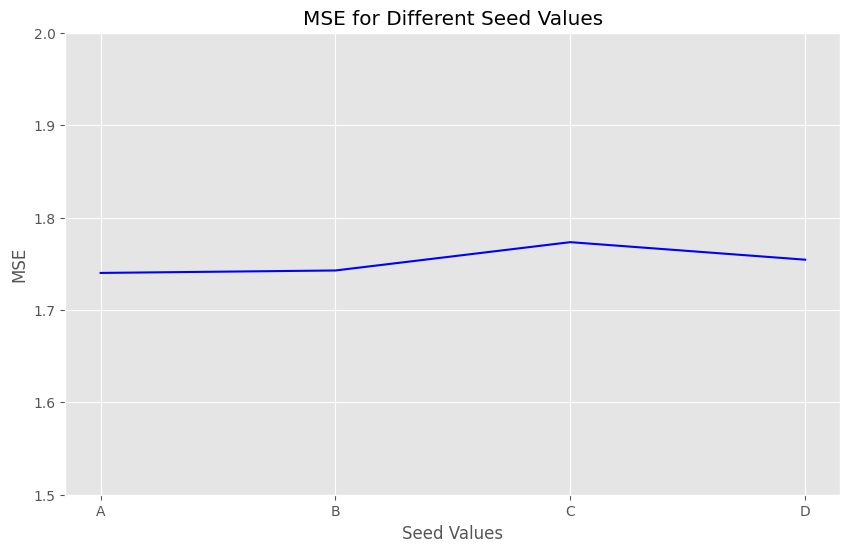

In [87]:
import matplotlib.pyplot as plt

# Seed values and corresponding MSE values
seed = ["A", "B", "C", "D"]
mse_values = [1.7400315999984741, 1.742687463760376, 1.7733334302902222, 1.7543696165084839]

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.plot(seed, mse_values, color='blue')
plt.xlabel('Seed Values')
plt.ylabel('MSE')
plt.title('MSE for Different Seed Values')
plt.xticks(seed)  # Setting x-ticks to seed values for clarity
plt.ylim(1.5, 2)  # Setting y-axis limits to min 0.5 and max 2
plt.grid(True)
plt.show()


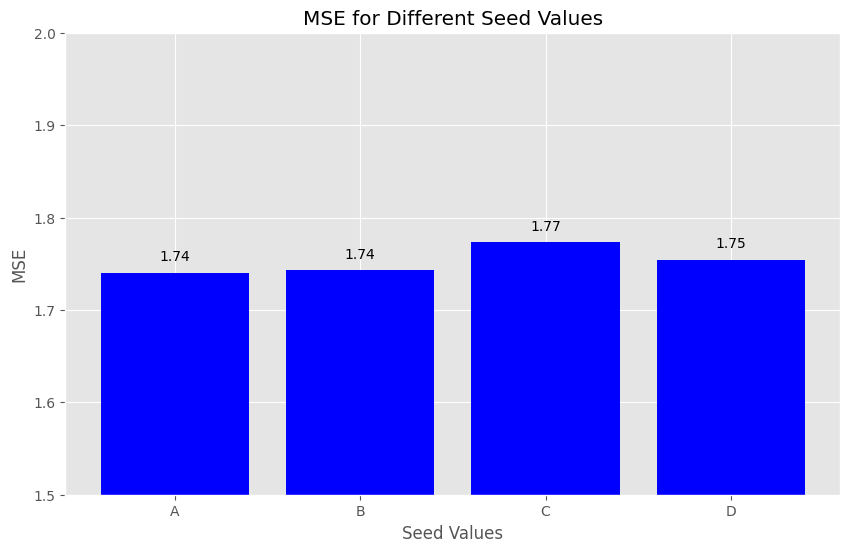

In [106]:
import matplotlib.pyplot as plt

# Seed values and corresponding MSE values
seed = ["A", "B", "C", "D"]
mse_values = [1.7400315999984741, 1.742687463760376, 1.7733334302902222, 1.7543696165084839]

# Creating a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(seed, mse_values, color='blue')
plt.xlabel('Seed Values')
plt.ylabel('MSE')
plt.title('MSE for Different Seed Values')
plt.xticks(seed)
plt.ylim(1.5, 2)  # Setting y-axis limits to min 1.5 and max 2
plt.grid(True)

# Adding the MSE values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


# Results stability as a function of samples

In [88]:
pred = np.load('/Users/raman/Projects/ExtFormer/results/long_term_forecast_Divvy_96_96_Autoformer_Divvy_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/pred.npy')
true = np.load('/Users/raman/Projects/ExtFormer/results/long_term_forecast_Divvy_96_96_Autoformer_Divvy_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/true.npy')
pred.shape

(384, 96, 200)

In [89]:
import sys
sys.path.append('../')
from utils.metrics import metric
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_mse_per_sample(preds, trues):
    """
    Calculate the Mean Squared Error for each sample in the batch.

    Parameters:
    preds (numpy.ndarray): Predicted values, shape (num_samples, timesteps, features)
    trues (numpy.ndarray): True values, shape (num_samples, timesteps, features)

    Returns:
    numpy.ndarray: An array of MSE values for each sample.
    """
    num_samples = preds.shape[0]
    mse_per_sample = np.zeros(num_samples)

    for i in range(num_samples):
        mse_per_sample[i] = mean_squared_error(trues[i], preds[i])

    return mse_per_sample

# Example usage
# preds = np.random.rand(384, 96, 200)  # Replace with your actual preds
# trues = np.random.rand(384, 96, 200)  # Replace with your actual trues
# mse_values = calculate_mse_per_sample(preds, trues)
# print(mse_values)


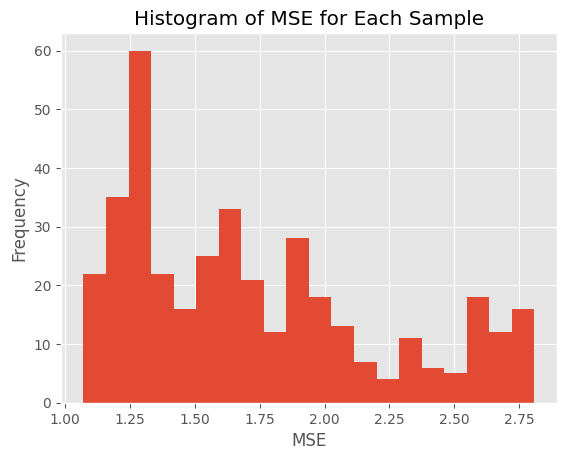

In [90]:
mse_values = calculate_mse_per_sample(pred, true)

pd.Series(mse_values).hist(bins=20)
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.title('Histogram of MSE for Each Sample')
plt.show()


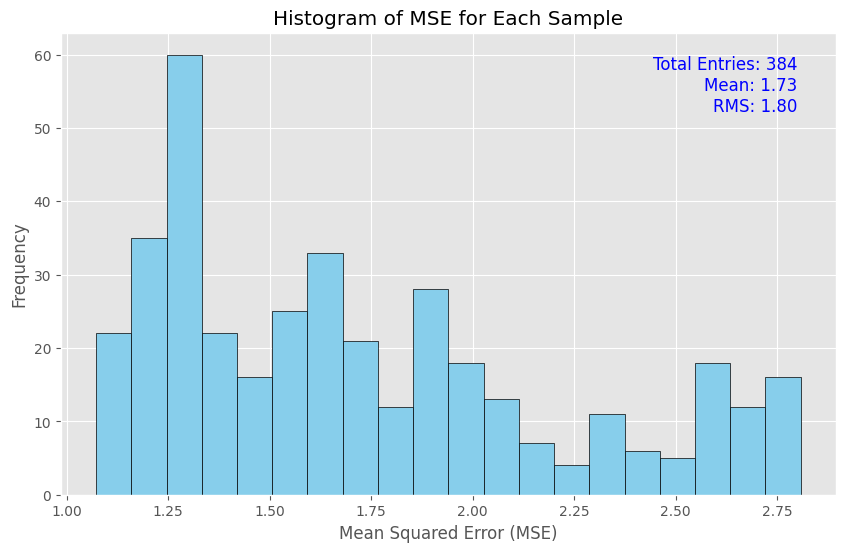

In [92]:
mean_mse = np.mean(mse_values)
rms_mse = np.sqrt(np.mean(np.square(mse_values)))

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
pd.Series(mse_values).hist(bins=20, color='skyblue', edgecolor='black')

# Annotating the plot with mean, RMS, and count
plt.text(0.95, 0.95, f'Total Entries: {len(mse_values)}\nMean: {mean_mse:.2f}\nRMS: {rms_mse:.2f}', 
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, color='blue', fontsize=12)

plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.title('Histogram of MSE for Each Sample')
plt.grid(True)
plt.show()


In [94]:
np.load('/Users/raman/Projects/ExtFormer/results/long_term_forecast_Divvy_96_96_Autoformer_Divvy_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/metrics.npy')

array([8.7130880e-01, 1.7302086e+00, 1.3153739e+00, 3.2748194e+00,
       3.0038823e+03], dtype=float32)

In [115]:
np.load("/Users/raman/Projects/ExtFormer/results/long_term_forecast_Divvy_96_96_DLinear_Divvy_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/DLinear_Divvy_Divvy_96_96_static2_metrics.npy")

array([  0.9141842,   2.3811343,   1.5430925,   1.6404996, 316.68332  ],
      dtype=float32)

In [ ]:
original=[0.004, 0.001, 0.0008, 0.0006]
autofe=[0.005, 0.0015, 0.001, 0.01 ]
tsfuse=[0.011, 0.008, 0.012, 0.025]

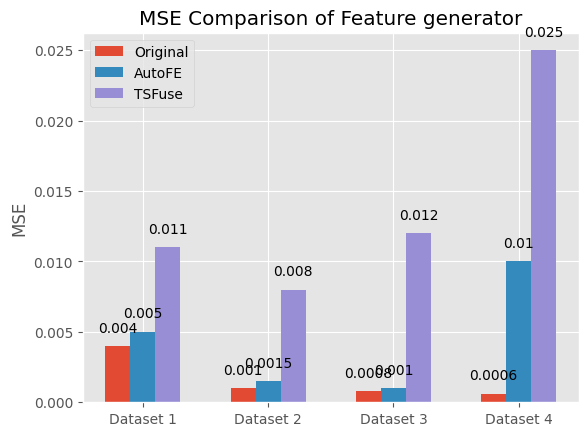

In [118]:
import matplotlib.pyplot as plt

# Data for the models
models = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
original = [0.004, 0.001, 0.0008, 0.0006]
autofe = [0.005, 0.0015, 0.001, 0.01]
tsfuse = [0.011, 0.008, 0.012, 0.025]

x = range(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x, original, width, label='Original')
ax.bar([p + width for p in x], autofe, width, label='AutoFE')
ax.bar([p + width * 2 for p in x], tsfuse, width, label='TSFuse')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE Comparison of Feature generator')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(models)
ax.legend()

# Label with the MSE value above each bar
for i in x:
    ax.text(i, original[i] + 0.001, str(original[i]), ha='center')
    ax.text(i + width, autofe[i] + 0.001, str(autofe[i]), ha='center')
    ax.text(i + width * 2, tsfuse[i] + 0.001, str(tsfuse[i]), ha='center')

plt.show()
